In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:

from nltk import word_tokenize, download
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords

In [3]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer

In [4]:
from sklearn import metrics as skmetrics
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, classification_report

In [5]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from tensorflow.keras.models import Sequential


In [6]:
from gensim.corpora.dictionary import Dictionary
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [7]:
import matplotlib.pyplot as plt

import time

import re
import pandas as pd
import numpy as np

In [8]:
download('punkt')
download('stopwords')
download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [9]:
stop_words = stopwords.words('english')

In [10]:
df_names = ['amazon_cells_labelled.txt','imdb_labelled.txt', 'yelp_labelled.txt']

In [11]:
path = 'https://raw.github.com/murilovalenso/Processamento-de-Linguagem-Natural/main/datasets/'

In [ ]:
dfs = [pd.read_csv(path+df_name, delimiter='\t', header=None, names=['text','sentiment'])
      for df_name in df_names]
df_reviews = pd.concat(dfs, axis=0, ignore_index=True)

In [ ]:
df_reviews.head(5)

,text,sentiment
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [ ]:
df_reviews.shape

(1000, 2)

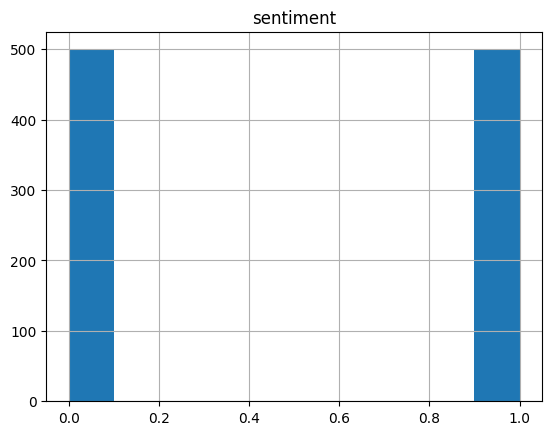

In [ ]:
df_reviews.hist();

In [ ]:
df_reviews.isnull().sum()

,0
text,0
sentiment,0


In [ ]:
documents = df_reviews['text'].str.lower().tolist()
target = df_reviews['sentiment'].to_numpy()

In [ ]:
documents [:10]

['so there is no way for me to plug it in here in the us unless i go by a converter.',
 'good case, excellent value.',
 'great for the jawbone.',
 'tied to charger for conversations lasting more than 45 minutes.major problems!!',
 'the mic is great.',
 'i have to jiggle the plug to get it to line up right to get decent volume.',
 'if you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.',
 'if you are razr owner...you must have this!',
 'needless to say, i wasted my money.',
 'what a waste of money and time!.']

## Limpando o texto

In [ ]:
texts_example = [
    'Where did you go to, if I may ask?\' said Thorin to Gandalf as they rode along.',
    'To look ahead,\' said he.',
    'And what brought you back in the nick of time?\'',
    'Looking behind,\' said he.'
]

In [ ]:
pattern = '[^A-Za-z0-9\s]+'
filter = lambda x : re.sub(pattern, '', x)

In [ ]:
texts_example = [filter(text) for text in texts_example]
texts_example

['Where did you go to if I may ask said Thorin to Gandalf as they rode along',
 'To look ahead said he',
 'And what brought you back in the nick of time',
 'Looking behind said he']

## Tokenização

In [ ]:
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
texts_tokens = [word_tokenize(doc) for doc in texts_example]
texts_tokens

[['Where',
  'did',
  'you',
  'go',
  'to',
  'if',
  'I',
  'may',
  'ask',
  'said',
  'Thorin',
  'to',
  'Gandalf',
  'as',
  'they',
  'rode',
  'along'],
 ['To', 'look', 'ahead', 'said', 'he'],
 ['And', 'what', 'brought', 'you', 'back', 'in', 'the', 'nick', 'of', 'time'],
 ['Looking', 'behind', 'said', 'he']]

### Remoção de Stop Words

In [ ]:
texts_tokens = [[token for token in text if token not in stop_words]
                  for text in texts_tokens]
texts_tokens =  texts_tokens
texts_tokens

[['Where',
  'go',
  'I',
  'may',
  'ask',
  'said',
  'Thorin',
  'Gandalf',
  'rode',
  'along'],
 ['To', 'look', 'ahead', 'said'],
 ['And', 'brought', 'back', 'nick', 'time'],
 ['Looking', 'behind', 'said']]

In [ ]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

### Stemming e Lemmatization

In [ ]:
text = ['foot', 'feet', 'friendship', 'live', 'life', 'make', 'making', 'something', 'some', 'someone']
stem = LancasterStemmer()
lem = WordNetLemmatizer()
print('stemming:')
print([stem.stem(t) for t in text])
print('lemmatizer:')
print([lem.lemmatize(t) for t in text])

stemming:
['foot', 'feet', 'friend', 'liv', 'lif', 'mak', 'mak', 'someth', 'som', 'someon']
lemmatizer:
['foot', 'foot', 'friendship', 'live', 'life', 'make', 'making', 'something', 'some', 'someone']


In [ ]:
lem = WordNetLemmatizer()
texts_tokens = [[lem.lemmatize(token) for token in text] for text in texts_tokens]
texts_tokens

[['Where',
  'go',
  'I',
  'may',
  'ask',
  'said',
  'Thorin',
  'Gandalf',
  'rode',
  'along'],
 ['To', 'look', 'ahead', 'said'],
 ['And', 'brought', 'back', 'nick', 'time'],
 ['Looking', 'behind', 'said']]

### Juntando ...

In [ ]:
class LemmaTokenizer:
    def __init__(self, regex_pattern='', stop_words=''):
        self.lemmatizer = WordNetLemmatizer()
        self.pattern = regex_pattern
        self.tokenize = lambda doc : word_tokenize(re.sub(self.pattern, '', doc))
        self.stop = stop_words
    def __call__(self, doc):
        return [self.lemmatizer.lemmatize(t) for t in self.tokenize(doc) if t not in self.stop]

In [ ]:
lem = LemmaTokenizer(regex_pattern='[^A-Za-z0-9\s]+', stop_words=stop_words)

In [ ]:
class ReporterClassifier:
    def __init__(self, strategies, reports, p_reports):
        self.reports = reports

        self.p_reports = p_reports

    def __call__(self, y_true, y_pred, strategie):
        self._apply_scores(y_true, y_pred, strategie)
        self.p_reports[strategie] = classification_report(y_true, y_pred)

    def _apply_scores(self, y_true, y_pred, strategie):
        metrics_ = [accuracy_score, f1_score, recall_score, precision_score]
        for metric_ in metrics_:
            if 'acc' in metric_.__name__:
                self.reports[strategie][metric_.__name__] = metric_(
                    y_true, y_pred
                )
            else:
                self.reports[strategie][metric_.__name__] = metric_(
                    y_true, y_pred, average = 'weighted'
                )

    def get_report(self, strategie):
        return self.reports[strategie], self.p_reports[strategie]

def text_padding(texts, vec = None, transform = None, neural_network = False, tokenizer = None):
    if neural_network :
        sequences = tokenizer.texts_to_sequences(texts)
        return pad_sequences(sequences)

    if vec is None:
        raise 'provide the vectorizer!'

    vec_ = vectorizer.transform(texts)
    if transform is not None:
        vec_ = transformer.transform(vec_).toarray()

    return vec_

In [ ]:
strategies = ['Count Vectorizer', 'TF-IDF Vectorizer', 'Word Embedding']
reporter = ReporterClassifier(strategies,
                              reports = {st: {accuracy_score.__name__: 0,
                                              f1_score.__name__: 0,
                                              recall_score.__name__: 0,
                                              precision_score.__name__: 0
                                             } for st in strategies},
                              p_reports = {st: '' for st in strategies})

## Count Vectorizer
![Imagem](https://miro.medium.com/max/2400/1*amonFSyYdSnm3avTrHy9Sw.png)

[Acesse a fonte](https://towardsdatascience.com/a-step-by-step-tutorial-for-conducting-sentiment-analysis-9d1a054818b6)


In [ ]:
vectorizer = CountVectorizer(tokenizer=lem)

In [ ]:
X_padding = vectorizer.fit_transform(documents)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
X_padding.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
X_padding.toarray().shape

(1000, 1677)

### Separando em treino e teste

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_padding.toarray(), target, test_size = 0.2, random_state = 42, stratify = target)

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)

reporter(y_test, y_pred, 'Count Vectorizer')
_, metrics_ = reporter.get_report('Count Vectorizer')

print(metrics_)

              precision    recall  f1-score   support

           0       0.77      0.80      0.78       100
           1       0.79      0.76      0.78       100

    accuracy                           0.78       200
   macro avg       0.78      0.78      0.78       200
weighted avg       0.78      0.78      0.78       200



In [ ]:
y_pred_train = model.predict(X_train)

print(classification_report(y_true=y_train, y_pred=y_pred_train))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       400
           1       0.98      0.97      0.98       400

    accuracy                           0.98       800
   macro avg       0.98      0.98      0.98       800
weighted avg       0.98      0.98      0.98       800



In [ ]:
texts = ['Today is a good day', 'Excellent store, highly recommend!!!', 'Bad service, never buy here']
model.predict(text_padding(texts, vec= vectorizer))

array([1, 1, 0])

### TF-IDF: Term Frequency-Inverse Document Frequency
$$ w_{i,j} = tf_{i,j} \cdot log({\frac{N}{df_i}}) $$
$$w_{i,j} = \text{peso tf-idf para o token i no documento j}$$
$$tf_{i,j} = \text{numero de ocorrências do token i no documento j}$$
$$df_{i} = \text{numero de documentos que contem o token i}$$
$$N = \text{numero total de documentos}$$

In [ ]:
transformer = TfidfTransformer()

In [ ]:
X_padding_tf_idf = transformer.fit_transform(X_padding)

In [ ]:
 X_padding_tf_idf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
arr = X_padding_tf_idf.toarray()

In [ ]:
arr[0].max()

0.4669466222062617

### Separando em treino e teste

In [ ]:
X_train_tf, X_test_tf, y_train_tf, y_test_tf = train_test_split(X_padding_tf_idf.toarray(), target, test_size = 0.2, random_state = 42)

In [ ]:
model = LogisticRegression()
model.fit(X_train_tf, y_train_tf)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test_tf)

reporter(y_test_tf, y_pred, 'TF-IDF Vectorizer')
_, metrics_ = reporter.get_report('TF-IDF Vectorizer')

print(metrics_)

              precision    recall  f1-score   support

           0       0.72      0.84      0.77        93
           1       0.84      0.71      0.77       107

    accuracy                           0.77       200
   macro avg       0.78      0.77      0.77       200
weighted avg       0.78      0.77      0.77       200



In [ ]:
y_pred_tft = model.predict(X_train_tf)

print(classification_report(y_true=y_train_tf, y_pred=y_pred_tft))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       407
           1       0.98      0.95      0.97       393

    accuracy                           0.97       800
   macro avg       0.97      0.97      0.97       800
weighted avg       0.97      0.97      0.97       800



y_pred_if = model.predict(X_train_if)

print(classification_report(y_true=y_test, y_pred=y_pred_if))

In [ ]:
texts = ['Today is a good day', 'Excellent store, highly recommend!!!', 'Bad service, never buy here']
model.predict(text_padding(texts, vec = vectorizer,  transform=transformer))

array([1, 1, 0])

## Word Embeddings
![Image](https://s3-us-west-1.amazonaws.com/sijunhe-blog/plots/post18/embedding_illustration.png)

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(documents)
sequences = tokenizer.texts_to_sequences(documents)
reviews = pad_sequences(sequences)
print(reviews), reviews.shape

[[   0    0    0 ...  190    6  812]
 [   0    0    0 ...   48   54  272]
 [   0    0    0 ...   11    1  417]
 ...
 [   0    0    0 ...   13  454  248]
 [   0    0    0 ...  764 1877 1878]
 [   0    0    0 ...  195   81  481]]


(None, (1000, 30))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(reviews, target, test_size = 0.2, random_state=42, stratify=target)

y_train = np.asarray(y_train).astype('float32').reshape((-1,1))
y_test = np.asarray(y_test).astype('float32').reshape((-1,1))

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 30), (200, 30), (800, 1), (200, 1))

In [ ]:
print(f'train:\nX: {X_train.shape}\n:y {y_train.shape}')
print(f'test:\nX: {X_test.shape}\ny: {y_test.shape}')

In [ ]:
max_len = max(X_train.max(), X_test.max(), y_train.max(), y_test.max())

In [ ]:
model = Sequential()
model.add(layers.Embedding(max_len+1, 30))
model.add(layers.Bidirectional(layers.LSTM(20, dropout=0.5)))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

callback = callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test), callbacks=[callback])

Epoch 1/200
25/25 [==============================] - 5s 56ms/step - loss: 0.6918 - accuracy: 0.5213 - val_loss: 0.6881 - val_accuracy: 0.5150
Epoch 2/200
25/25 [==============================] - 1s 20ms/step - loss: 0.6814 - accuracy: 0.6225 - val_loss: 0.6742 - val_accuracy: 0.7250
Epoch 3/200
25/25 [==============================] - 1s 20ms/step - loss: 0.6512 - accuracy: 0.7150 - val_loss: 0.6390 - val_accuracy: 0.7550
Epoch 4/200
25/25 [==============================] - 0s 20ms/step - loss: 0.5981 - accuracy: 0.7625 - val_loss: 0.5892 - val_accuracy: 0.7650
Epoch 5/200
25/25 [==============================] - 0s 19ms/step - loss: 0.5170 - accuracy: 0.8012 - val_loss: 0.5402 - val_accuracy: 0.7850
Epoch 6/200
25/25 [==============================] - 1s 20ms/step - loss: 0.4481 - accuracy: 0.8288 - val_loss: 0.4906 - val_accuracy: 0.7800
Epoch 7/200
25/25 [==============================] - 0s 20ms/step - loss: 0.3856 - accuracy: 0.8675 - val_loss: 0.4464 - val_accuracy: 0.7900
Epoch 

In [ ]:
y_pred = history.model.predict(X_test)
y_pred = np.round(y_pred)

reporter(y_test, y_pred, 'Word Embedding')
_, metrics_ = reporter.get_report('Word Embedding')

print(metrics_)

              precision    recall  f1-score   support

         0.0       0.82      0.79      0.81       100
         1.0       0.80      0.83      0.81       100

    accuracy                           0.81       200
   macro avg       0.81      0.81      0.81       200
weighted avg       0.81      0.81      0.81       200



In [ ]:
texts = ['Today is a good day', 'Excellent store, highly recommend!!!', 'Bad service, never buy here']
y_ = model.predict(text_padding(texts, neural_network=True, tokenizer=tokenizer))
np.round(y_)

array([[1.],
       [1.],
       [0.]], dtype=float32)

In [ ]:
def plot(history, metric):
    plt.plot(history[metric])
    plt.plot(history['val_'+metric])
    plt.title(f'model {metric}')
    plt.ylabel(metric)
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')

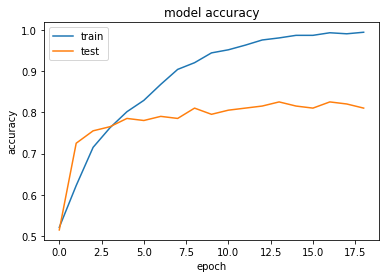

In [ ]:
from matplotlib import interactive
plot(history.history, 'accuracy')
plt.show()

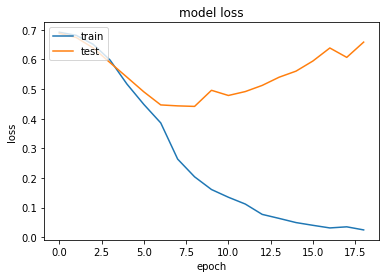

In [ ]:
plot(history.history, 'loss')
plt.show()

In [ ]:
pd.DataFrame(reporter.reports)

,Count Vectorizer,TF-IDF Vectorizer,Word Embedding
accuracy_score,0.770000,0.770000,0.810000
f1_score,0.770138,0.769816,0.809924
recall_score,0.770000,0.770000,0.810000
precision_score,0.775835,0.779565,0.810497


#### Referencias

<a href='https://towardsdatascience.com/natural-language-processing-count-vectorization-with-scikit-learn-e7804269bb5e'> Vectorização </a>